# DATA SCIENCE I
## PROYECTO FINAL - AGOSTINA FONTANA

## Resumen ejecutivo

Para la selección del dataset exploramos la siguiente página: https://www.kaggle.com/datasets

La apertura de la línea de crédito para la obtención de créditos hipotecarios a baja tasa de interés en el Banco Nación Argentina reactivó el mercado inmobiliario, aumentando el nivel de demanda de propiedades principalmente a aquellas personas, como es mi caso, que no poseen vivienda propia y se encuentran pagando un alquiler.

Por tal motivo seleccioné el siguiente dataset el cual se encuentra vinculado al rubro inmobiliario de Argentina:

https://www.kaggle.com/datasets/alejandroczernikier/properati-argentina-dataset

El objetivo del análisis consistió en explorar y evaluar las características de las propiedades que se encuentran disponibles en el mercado buscando un equilibrio entre el precio de la propiedad, los atributos, el procecio y; también, haciendo una comparativa entre el pago de la cuota del crédito y el pago mensual del alquiler.

## Características del dataset


El dataset posee 922K propiedades con 25 columnas donde se describen los atributos de cada uno de las unidades publicadas en la plataforma de búsqueda de propiedades "Properati".

El mismo posee información respecto a: 
- Datos de georeferenciación de la propiedad
- Cantidad de ambientes
- Superficie (m2)
- Tipo de Propiedad
- Precio de la Propiedad
- Tipo de Operación (Venta o Alquiler)
- Descripción de la propiedad
- etc. 

A partir del Análisis EDA (Exploratory Analysis EDA) identificamos errores, patrones dentro de los datos, valores que no aplican a nuestro análisis y decidimos desestimarlos, y, valores anómalos (outliers) los cuales fueron análizados y tratados a través de las diferentes herramientas / técnicas adquiridas durante el curso de Data Science I de Coderhouse.  

## Hipótesis

1) El partido de San Isidro (donde actualmente alquilo) presenta un valor por metro2 significativamente más alto en el valor de compra que otras zonas perféricas, lo que indicaría que mudarse a zonas mas alejadas podría representar un ahorro o una propiedad con mayor cantidad de m2.
2) Costo de Compra vs alquiler
"El costo mensual equivalente a comprar una propiedad (cuota crédito hipotecario) es igual o comparable al costo mensual de alquilar una propiedad similar en la misma zona"


## Carga y exploración de datos


Al ser un dataset de Kaggle tengo dos opciones: 
- Descargarlo a mi computadora y linkearlo a la ruta donde lo guarde o lo guardo en la misma carpeta que guardé el proyecto.ipynb.
- Conectarlo a la WEB de Kaggle.

Voy a seleccionar la última opción

In [2]:
# Instalo Librerías a utilizar en el proyecto:
# Para acceder al dataset
import kagglehub as kh 
# Para manipular las bases de datos
import numpy as np
import pandas as pd
# Para generar visualizaciones
import seaborn as sns
import matplotlib as plt

c:\Users\afontan1\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Descargo el dataset seleccionado
path = kh.dataset_download("alejandroczernikier/properati-argentina-dataset")

# Verifico la ruta descargada
print ('Ruta del dataset',path)

Ruta del dataset C:\Users\afontan1\.cache\kagglehub\datasets\alejandroczernikier\properati-argentina-dataset\versions\1


In [4]:
# Valido si dentro de la carpeta tengo archivos y si se encuentra con extensión CSV. 
# La librería "os" nos va a permitir interactuar con el sistema operativo y validar si el archivo existe
import os
Archivos_CSV= [f for f in os.listdir(path) if f.endswith('.csv')]
print ('Archivos CSV Encontrados',Archivos_CSV)

Archivos CSV Encontrados ['entrenamiento.csv']


In [5]:
# Defino el Data Frame leyendo el CSV que se encuentra en la ruta del data set obtenida en el paso anterior
df= pd.read_csv('C:/Users/afontan1/.cache/kagglehub/datasets/alejandroczernikier/properati-argentina-dataset/versions/1/entrenamiento.csv')


In [6]:
# Utilizo la función head() para mostrar las primeras 5 filas del Dataframe (df) importado permitiendo una visualización rápida de los datos.
# Como me indica que tengo 25 columnas y con head() me muestra solo 20 voy a utilizar una formula para que no las limite.

pd.set_option('display.max_columns',None)

df.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
0,556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,NaN,NaN,NaN,3.0,2.0,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
1,192912,Propiedad,2020-06-05,2020-06-08,2020-06-05,-58.430493,-34.606620,Argentina,Capital Federal,Almagro,NaN,NaN,NaN,3.0,2.0,2.0,77.0,67.0,USD,NaN,Departamento de 3 ambientes en Venta en Almagro,Excelente departamento de tres ambientes ampli...,Departamento,Venta,235500.0
2,238224,Propiedad,2020-07-01,9999-12-31,2020-07-01,-58.491760,-34.574123,Argentina,Capital Federal,Villa Urquiza,NaN,NaN,NaN,2.0,NaN,1.0,60.0,55.0,USD,NaN,Andonaegui 2600 4° - - Departamento en Venta,Excelente 3 ambientes al frente con balcón. Vi...,Departamento,Venta,175000.0
3,257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-58.420737,-34.631770,Argentina,Capital Federal,Boedo,NaN,NaN,NaN,2.0,1.0,1.0,74.0,47.0,USD,NaN,PH Venta Boedo 2 amb Patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta,140000.0
4,521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,NaN,NaN,NaN,3.0,2.0,1.0,66.0,64.0,USD,NaN,Venta 3 Ambientes - Almagro - Balcón - Ameniti...,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,173000.0


In [7]:
# Verifico la cantidad de registros que tiene mi Dataframe

df.shape

(992192, 25)

## Manipulación de datos

Una vez descargado el dataset vamos a manipular los datos, realizando las siguientes acciones: 
- SELECCIÓN / ELIMINACIÓN DE COLUMNAS: Cumpliendo con el requisito mínimo de presentar un proyecto con mínimo 15 columnas, analizaremos de las 25 cuales generan valor para el análisis que quiero efectuar.
- SELECCIÓN / ELIMINACIÓN DE FILAS: No tendremos en cuenta todas las propiedades del Dataset. Haremos una selección sobre la ubicación geográfica de acuerdo a la zona de interés, compararemos únicamente las propiedades que se encuentran en USD y, adicionalmente, revisaremos aquellas propiedades tipo "casa"

In [8]:
#Quiero indagar en los diferentes tipos de ad_type para ver si tiene sentido dejar o no la columna
AD_TYPE= df['ad_type'].value_counts()
print (AD_TYPE)
# Lo elimino. Toda la fila dice lo mismo

ad_type
Propiedad    992192
Name: count, dtype: int64


Elimino las columnas que no me generan valor para el análisis: 
* ad_type: Todas indican la palabra "Propiedad". No categoriza nada
* Datos de Geolocalización: l5 y l6. Nos dan mayor capilaridad en la zona en la cual se encuentra la propiedad pero muchas propiedades no cuentan con ese dato completo. 
* Title y Description: Si bien, nos puede brindar información de la propiedad específica, al ser campos de texto libre no es posible normalizar y encontrar un patrón o tendencia en dichos datos.

In [9]:
# Para efectuar las modificaciones, crearemos un nuevo dataframe, para en caso de querer recuperar el df original poder hacerlo
df_analisis=df.drop(['ad_type','l5','l6','title','description'],axis=1)


Elimino las filas que no me generan valor para el análisis:
* Geolocalización: Solamente vamos a analizar las propiedades que se encuentran en el Gran Buenos Aires Norte.
* Operation_Type: Solamente analizaremos las propiedades en Venta (Luego analizaremos en otro DF los precios de los alquileres para comprobar o refutar la hipótesis)
* Property_type: Solamente analizaremos las propiedades que son "Casa" o "PH"
* Currency: Solo analizaremos propiedades con currency USD. Si bien las propiedades en venta suelen publicarse en USD realizaremos dicho filtro para estar seguros que estamos comparando en forma correcta siendo el precio un valor crucial para el análisis.

In [10]:
# Voy a realizar los filtros correspondientes

filtros= (df_analisis['l2']=='Bs.As. G.B.A. Zona Norte') & (df_analisis['operation_type']=='Venta') & (df_analisis['property_type']=='Casa') & (df_analisis['currency']=='USD')

In [11]:
#Aplico los filtros al Dataframe

df_analisis=df_analisis[filtros]

In [12]:
# Analizo el DF luego de las columnas y las filas eliminadas a través de las siguientes sentencias: 

df_analisis.shape

(37061, 20)

Como puedo observar se ven impactadas las 5 columnas eliminadas.
Con los filtros realizados, el data frame inicial de 992K registros se redujo a 37K (3.7%).
No significa que estoy solamente analizando el 3,7% del universo, sino que el 96.3% de la base no aplica para mi analisis (quiero analizar las ventas, de propiedades que son casas, en una zona en particular y los valores deben estar en USD)

In [13]:
# Exploro el nuevo DF a través de las sentencias de head y de describe

df_analisis.head()

,id,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,property_type,operation_type,price
5658,6,2019-07-07,9999-12-31,2019-07-07,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,NaN,NaN,9.0,NaN,4.0,300.0,NaN,USD,Mensual,Casa,Venta,490000.0
5660,8,2019-07-07,9999-12-31,2019-07-07,-58.713329,-34.390757,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,NaN,7.0,NaN,3.0,286.0,262.0,USD,Mensual,Casa,Venta,545000.0
5661,9,2019-07-07,9999-12-31,2019-07-07,-58.688607,-34.364683,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,Dique Luján,NaN,NaN,NaN,NaN,NaN,USD,Mensual,Casa,Venta,165000.0
5662,10,2019-07-07,9999-12-31,2019-07-07,-58.579659,-34.425087,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,Dique Luján,NaN,NaN,NaN,NaN,NaN,USD,Mensual,Casa,Venta,97000.0
6072,428,2019-07-07,2019-07-09,2019-07-07,-58.679008,-34.447492,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,Ricardo Rojas,NaN,2.0,1.0,100.0,100.0,USD,NaN,Casa,Venta,140000.0


In [14]:
df_analisis.describe()

,id,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,37061.000000,26517.000000,26559.000000,18273.000000,27128.000000,35587.000000,28562.000000,33099.000000,3.706100e+04
mean,466825.877850,-58.691878,-34.437279,4.419198,3.350966,2.855340,582.083503,244.045560,4.049856e+05
std,285922.307899,0.168669,0.116081,1.540836,5.532231,1.257644,2757.096346,1478.150839,3.704894e+05
min,6.000000,-68.843512,-40.826143,1.000000,0.000000,1.000000,0.000000,1.000000,5.000000e+03
25%,213274.000000,-58.765873,-34.481887,3.000000,3.000000,2.000000,200.000000,148.000000,1.990000e+05
50%,465315.000000,-58.688061,-34.431851,4.000000,3.000000,3.000000,300.000000,200.000000,3.100000e+05
75%,694687.000000,-58.579658,-34.389687,5.000000,4.000000,4.000000,664.000000,263.000000,4.650000e+05
max,999987.000000,-55.946708,-22.725157,40.000000,900.000000,12.000000,200000.000000,235000.000000,6.500000e+06


## Tratamiento de datos nulos / ausentes

Vamos a analizar la cantidad de registros nulos por cada uno de los atributos del dataframe y en base a ello, analizaremos que estrategia utilizaremos para cada caso

In [15]:
# Los detectamos utilizando "isnull" sobre el dataframe y utilizamos la suma para que nos cuente los true (1)

df_analisis.isnull().sum()

id                     0
start_date             0
end_date               0
created_on             0
lat                10544
lon                10502
l1                     0
l2                     0
l3                   628
l4                 14338
rooms              18788
bedrooms            9933
bathrooms           1474
surface_total       8499
surface_covered     3962
currency               0
price_period       20663
property_type          0
operation_type         0
price                  0
dtype: int64

De las 20 columnas, 10 atributos contienen datos nulos en las 37.061 propiedades de nuestro dataset. 

El tratamiento que realizaremos va a diferir de la cantidad de datos nulos y la naturaleza del dato y la importancia para nuestro análisis. 

A continuación detallamos la estrategia para cada caso: 
* A) Relleno el dato con un valor constante:
    - Lat, Long, l3 y l4: Me brindan información de la georeferencia de la propiedad. En caso que no tengan este dato coloco ""
* B) Elimino columnas:
    - Price_period: Al tener todos los valores de mi dataset en USD no es relevante la temporalidad del precio.
    - Rooms: Al no contar con este dato en casi la mitad del dataset lo vamos a eliminar para todos los registros.

* C) Elimino filas que contienen valores nulos: 
    - Surface_Total y Surface_Covered: Son datos fundamentales que me van a permitir analizar el valor por m2 de la propiedad. Analizar propiedades sin ese dato no me va a permitir realizar una comparativa adecuada.
    
* D) Imputo los valores nulos con la media (medida de tendencia central):
    - Bathroom, bedrooms: Voy a imputar el valor medio de los datos, pero lo voy a imputar de acuerdo a la media de propiedades con dimensiones similares (metros cuadrados cubiertos)

In [16]:
# A) Relleno con Valor Constante = 0

df_analisis[['lat','lon','l3','l4']]= df_analisis[['lat','lon','l3','l4']].fillna(0)

Para eliminar filas y columnas voy a renombrar el dataframe para que no me afecte al df_analisis y pueda recuperarlo en caso de ser necesario

In [ ]:
# B) Defino las columnas que quiero eliminar
Columnas_eliminar=['price_period','rooms']

In [18]:
# Elimino columnas del df_analisis generando un nuevo df

df_analisis_VF=df_analisis.drop(columns=Columnas_eliminar)

In [19]:
# Valido si se eliminaron las columnas a través de shape (debe pasar de 20 a 18)

df_analisis_VF.shape

(37061, 18)

In [ ]:
# C) Elimino filas donde los valores sean igual a 0
df_analisis_VF=df_analisis_VF.dropna(subset=['surface_total','surface_covered'])

In [21]:
# Valido si se eliminaron las filas a través de shape (debe reducirse los 37061 propiedades) y valido que no hayan quedado nulos en esos dos atributos
df_analisis_VF.isnull().sum()

id                    0
start_date            0
end_date              0
created_on            0
lat                   0
lon                   0
l1                    0
l2                    0
l3                    0
l4                    0
bedrooms           6654
bathrooms           547
surface_total         0
surface_covered       0
currency              0
property_type         0
operation_type        0
price                 0
dtype: int64

In [22]:
df_analisis_VF.shape

(28015, 18)

El tratamiento de los nulos de los valores que reemplazo por la media quiero que consideren la media de propiedades con superficies similares, por lo cual realizaremos lo siguiente: 
* Definimos intervalos de superficie cubierta (cada 50 m2)
* Asignamos a cada una de las propiedades un intervalo de acuerdo a su superficie cubierta (recordemos que eliminamos todos los valores nulos de esta columna, por lo que contamos con el 100% de los datos)
* Calculamos la media de cada columna con nulos dentro del grupo de análisis.
* Imputamos los valores nulos usando la media calculada en el paso anterior

In [23]:
# 4) Defino intervalos
df_analisis_VF['surface_covered_grupo']= (df_analisis_VF ['surface_covered']// 50) * 50

In [26]:
# Defino las columnas a imputar con la media
columnas_imputar_media= ['bedrooms','bathrooms']

# Imputo valores nulos con la media del grupo correspondiente de acuerdo a los m2 de la propiedad.
for col in columnas_imputar_media:
    df_analisis_VF[col] = df_analisis_VF.groupby('surface_covered_grupo')[col].transform(
        lambda x: x.fillna(x.mean())
    )


In [27]:
# Verifico que no tenga valores nulos en ninguna columna, posterior al tratamiento de las 10 columnas que tenían valores nulos

df_analisis_VF.isnull().sum()

id                       0
start_date               0
end_date                 0
created_on               0
lat                      0
lon                      0
l1                       0
l2                       0
l3                       0
l4                       0
bedrooms                 5
bathrooms                2
surface_total            0
surface_covered          0
currency                 0
property_type            0
operation_type           0
price                    0
surface_covered_grupo    0
dtype: int64

In [28]:
# Para ver como quedo nuestro dataset voy a utilizar describe(), sentencia que me va a permitir indagar los valores numéricos de mi dataset

df_analisis_VF.describe()

,id,lat,lon,bedrooms,bathrooms,surface_total,surface_covered,price,surface_covered_grupo
count,28015.000000,28015.000000,28015.000000,28010.000000,28013.000000,28015.000000,28015.000000,2.801500e+04,28015.000000
mean,453613.076887,-41.189508,-24.165150,3.373202,2.947329,576.348563,251.288810,4.317042e+05,230.389077
std,286098.941141,26.852370,15.753926,5.428573,1.254241,2450.958255,1605.285031,3.882928e+05,1605.631307
min,8.000000,-68.843512,-40.826143,1.000000,1.000000,14.000000,1.000000,5.000000e+03,0.000000
25%,198796.500000,-58.732140,-34.452137,3.000000,2.000000,201.000000,150.000000,2.200000e+05,150.000000
50%,438902.000000,-58.623990,-34.395683,3.000000,3.000000,302.000000,200.000000,3.350000e+05,200.000000
75%,671163.500000,0.000000,0.000000,4.000000,4.000000,675.000000,268.000000,4.900000e+05,250.000000
max,999987.000000,0.000000,0.000000,900.000000,12.000000,169000.000000,235000.000000,6.500000e+06,235000.000000


## Herramientas de visualización

Las herramientas de visualización me permiten ver en forma gráfica los datos que contiene mi dataset. 
Para ello vamos a importar las bibliotecas necesarias para crearlos y vamos a seleccionar diferentes gráficos que nos permitan comprobar o refutar las hipótesis planteadas.

In [29]:
# Importo las librerias necesarias para efectuar los gráficos

import matplotlib.pyplot as plt
import seaborn as sns

### GRAFICO 1

GRÁFICO DE BARRAS

Objetivo: Analizar la composición de nuestros datos. En este caso queremos validar la cantidad de propiedades que tenemos por cada partido (l3)


In [32]:
# Defino los datos sobre los cuales quiero trabajar
propiedades_partido=df_analisis_VF['l3'].value_counts()
print (propiedades_partido)

l3
Tigre                  10513
Escobar                 5021
Pilar                   4829
San Isidro              3064
Vicente López           1485
General San Martín       825
San Miguel               629
San Fernando             539
Malvinas Argentinas      485
0                        452
José C Paz               173
Name: count, dtype: int64


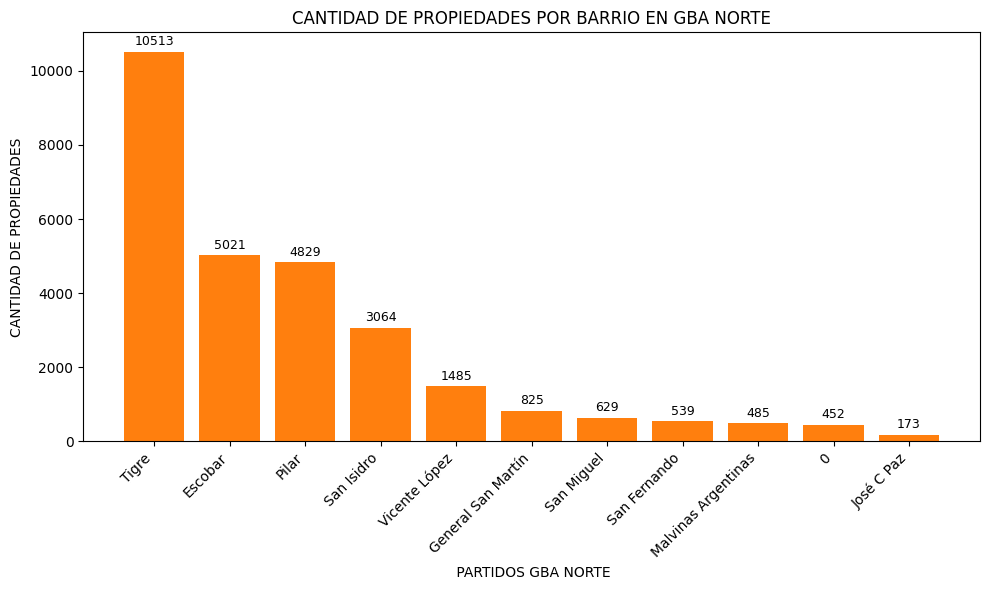

In [38]:
# Definimos el tamaño del gráfico

plt.figure(figsize=(10,6))

# Creamos el gráfico
plt.bar(propiedades_partido.index.astype(str), propiedades_partido.values)
plt.xticks(rotation=45, ha='right')

# Agrego las etiquetas a las series de datos

#  Defino el nombre del grafico

GRAFICO1= plt.bar(propiedades_partido.index.astype(str), propiedades_partido.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel(' PARTIDOS GBA NORTE')
plt.ylabel('CANTIDAD DE PROPIEDADES')
plt.title('CANTIDAD DE PROPIEDADES POR BARRIO EN GBA NORTE')
plt.tight_layout()

# Obtengo el valor de la barra (que cantidad por cada barrio)

for barra in GRAFICO1:
    altura = barra.get_height()

#  Mido el ancho de la barra (get_with), la posición horizontal de la barra (get_x) y coloco el texto (text: etiqueta)
    plt.text(barra.get_x() + barra.get_width() / 2, altura + 100, str(altura),
             ha='center', va='bottom', fontsize=9)


El gráfico me indica la cantidad de propiedades de mi dataset por partido, viendo mayor cantidad de propiedades en el partido de Tigre, el cual contiene diferentes localidades las cuales se encuentran detalladas en l5.

Las 452 propiedades con valor 0 corresponden a los datos nulos de l3 imputados en el paso anterior

### GRAFICO 2

GRÁFICO DE DISPERSIÓN

Lo vamos a utilizar para análizar la relación entre dos variables: Precio de la unidad y Superficie total. 
Con el gráfico tenemos como objetivo identificar relaciones, detectar patrones y evaluar la fuerza de la relación. 

Previo a comenzar a realizar el gráfico voy a eliminar los partidos que son = '0'

In [39]:
# Voy a quitar del análisis los barrios que son = '0'
df_analisis_VF=df_analisis_VF[df_analisis_VF['l3'] !=0]

In [47]:
# Voy a convertir los precios en miles de dolares
df_analisis_VF.loc['Precio_Miles']=df_analisis_VF['price']/1000

C:\Users\afontan1\AppData\Local\Temp\ipykernel_3132\1633361649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analisis_VF.loc['Precio_Miles']=df_analisis_VF['price']/1000


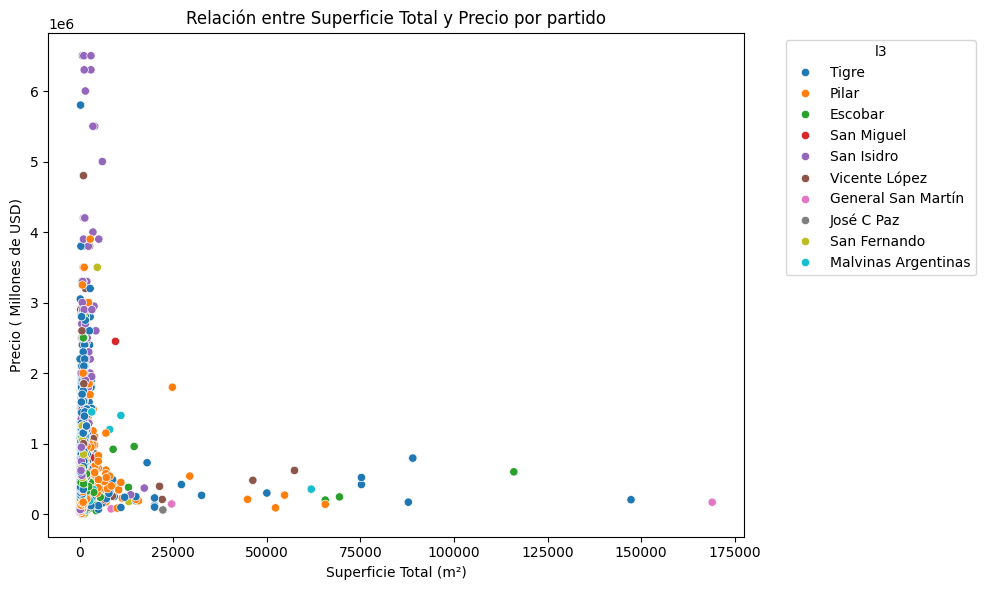

In [51]:
# Creo el gráfico de dispersión con seaborn y matplotlib
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data= df_analisis_VF,
    x='surface_total',
    y='price',
    hue='l3',
    palette='tab10'
)

# Títulos y etiquetas
plt.title('Relación entre Superficie Total y Precio por partido')
plt.xlabel('Superficie Total (m²)')
plt.ylabel('Precio ( Millones de USD)')

# Mostrar leyenda con los colores por barrio
plt.legend(title='l3', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Por lo que observamos en el gráfico de dispersión, tenemos outliers (observaciones que se encuentran a una distancia anormal del resto de los datos de las propiedades).

Es crucial tratarlos para que no distorsionen nuestro análisis. 

Para ello vamos a utilizar un tercer gráfico.

### GRAFICO 3

BOXPLOT (DIAGRAMA DE CAJA Y BIGOTES)

Utilizaremos este gráfico como otra forma de visualizar los outliers identificados en el diagrama de dispersión.
En la caja va a contener el 50% central de los datos (Rango intercuartil Q1 a Q3). Los bigotes se extienden desde las puntas de la caja hasta el valor mínimo y máximo dentro de 1.5 veces del rango intercuartil desde Q1 y Q3 respectivamente. 
Los outliers los identificaremos como cualquier punto que se encuentre por fuera de la caja y los bigotes

Text(0.5, 0, 'Partido')

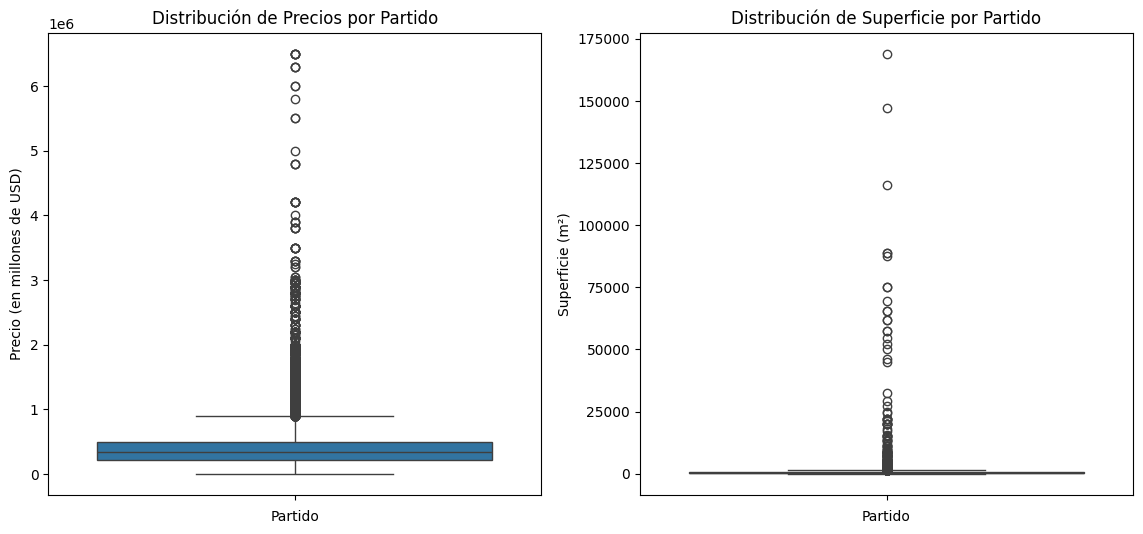

In [53]:
# Configuro el layout y la medida del gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df_analisis_VF,y=df_analisis_VF['price'],ax=axes[0])
axes[0].set_title('Distribución de Precios por Partido')
axes[0].set_ylabel('Precio (en millones de USD)')
axes[0].set_xlabel('Partido')

sns.boxplot(data=df_analisis_VF,y=df_analisis_VF['surface_total'], ax=axes[1])
axes[1].set_title('Distribución de Superficie por Partido')
axes[1].set_ylabel('Superficie (m²)')
axes[1].set_xlabel('Partido')

## Manejo de Outliers: Técnica de Rango Intercuartil

Para manejar y terminar de interpretar los outliers vamos a analizar la técnica de rango intercuartil

In [91]:
# Calculamos Q1 (primer cuartil) y Q3 (tercer cuartil)

#P= Corresponde a precio
Q1P= df_analisis_VF['price'].quantile(0.25)
Q3P= df_analisis_VF['price'].quantile(0.75)
IQRP= Q3P-Q1P

#S= Corresponde a la superficie
Q1S= df_analisis_VF['surface_total'].quantile(0.25)
Q3S= df_analisis_VF['surface_total'].quantile(0.75)
IQRS=Q3S-Q1S

In [92]:
# Defino los limites para detectar los outliers

limite_inferior_p= Q1P-1.5*IQRP
limite_superior_p= Q3P+1.5*IQRP


limite_inferior_S= Q1S-1.5*IQRS
limite_superior_s= Q3S+1.5*IQRS

In [ ]:
# Filtro los outliers
# Outliers Precio
outliers_precio = df_analisis_VF[(df_analisis_VF['price']<limite_inferior_p)| (df_analisis_VF['price']>limite_superior_p)]
# Outliers Superficie
outliers_superficie= df_analisis_VF[(df_analisis_VF['surface_total']<limite_inferior_S) | (df_analisis_VF['surface_total']>limite_superior_s)]

Voy a eliminar de mi análisis las propiedades con precio o superficie que superan al limite superior analizado. 
Los valores pueden estar incorrectos o pueden ser correctos pero no son representativos para mi análisis distorsionandolo

In [94]:

df_analisis_VF_sin_outliers_sup = df_analisis_VF[(df_analisis_VF['price'] <= limite_superior_p) & (df_analisis_VF['surface_total'] <= limite_superior_s)]


### GRAFICO 4

Vuelvo a generar el gráfico de dispersión sin los outliers

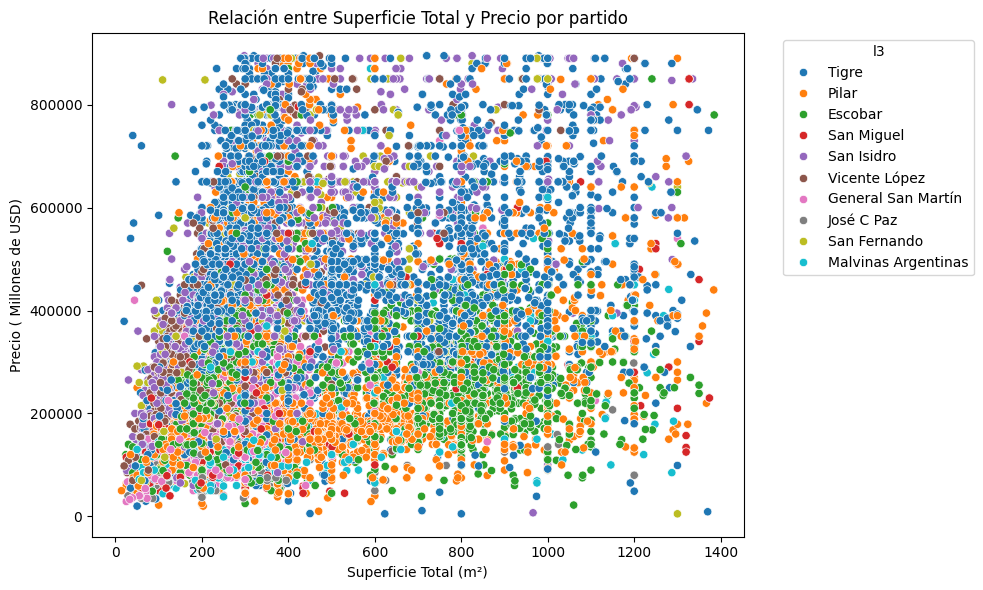

In [95]:
# Creo el gráfico de dispersión con seaborn y matplotlib
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data= df_analisis_VF_sin_outliers_sup,
    x='surface_total',
    y='price',
    hue='l3',
    palette='tab10'
)

# Títulos y etiquetas
plt.title('Relación entre Superficie Total y Precio por partido')
plt.xlabel('Superficie Total (m²)')
plt.ylabel('Precio ( Millones de USD)')

# Mostrar leyenda con los colores por barrio
plt.legend(title='l3', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [100]:
# Para tener como referencia me traigo la media de la superficie total. Al haber quitado los outliers es la medida de tendencia central que considero que mejor se ajusta para mi análisis
df_analisis_VF_sin_outliers_sup['surface_total'].mean()


np.float64(403.5515530455829)

In [101]:
#Obtengo también la media del precio
df_analisis_VF_sin_outliers_sup['price'].mean()

np.float64(345293.18390480033)

El gráfico de dispersión me permite visualizar lo siguiente en primera instancia: 
* Tigre, partido con mayor cantidad de propiedades, es el partido con mayor variabilidad de propiedades en relación al precio y a la superficie. Para un análisis más profundo quizás deberíamos analizar con mayor capilaridad la zona, viendo el campo l4.
* Pilar y Escobar concentran la mayoria de sus propiedades en un precio inferior a la media con terrenos superior a la media. 
* San Miguel, Jose C. Paz y Malvinas Argentinas tienen pocas propiedades en mi dataset por lo que se dificulta la visualización, pero parecieran ser propiedades con el menor valor de todo nuestro dataset, teniendo malvinas argentinas y san miguel propiedades de m2 cercanos al limite superior.
* San Fernando no visualizo un patrón uniforme en los datos
* Vicente Lopez y San Isidro tienen variabilidad respecto al precio pero no encontramos propiedades de gran superficie, a excepción de unas pocas en San Isidro

### GRAFICO 5

Para un mejor análisis vamos a realizar el cálculo por m2 agregando una columna a nuestro dataframe donde haga el calculo del precio dividido la superficie total y luego lo vamos a comparar por partido

In [103]:
df_analisis_VF_sin_outliers_sup.loc[:,'precio_m2']= df_analisis_VF_sin_outliers_sup['price'] / df['surface_total']

In [104]:
df_analisis_VF_sin_outliers_sup.head()

,id,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,bedrooms,bathrooms,surface_total,surface_covered,currency,property_type,operation_type,price,surface_covered_grupo,Precio_Miles,precio_m2
5660,8.0,2019-07-07,9999-12-31,2019-07-07,-58.713329,-34.390757,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,0,3.685934,3.0,286.0,262.0,USD,Casa,Venta,545000.0,250.0,545.0,1905.594406
6072,428.0,2019-07-07,2019-07-09,2019-07-07,-58.679008,-34.447492,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,Ricardo Rojas,2.000000,1.0,100.0,100.0,USD,Casa,Venta,140000.0,100.0,140.0,1400.000000
6209,576.0,2019-07-07,2019-07-09,2019-07-07,-58.891916,-34.417323,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Villa Rosa,3.000000,3.0,843.0,218.0,USD,Casa,Venta,315000.0,200.0,315.0,373.665480
6210,577.0,2019-07-07,2019-07-09,2019-07-07,-58.857216,-34.406290,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,0,3.000000,3.0,630.0,167.0,USD,Casa,Venta,209000.0,150.0,209.0,331.746032
6212,579.0,2019-07-07,2019-07-09,2019-07-07,0.000000,0.000000,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,3.000000,2.0,800.0,150.0,USD,Casa,Venta,210000.0,150.0,210.0,262.500000


In [120]:
promedio_m2_por_partido = df_analisis_VF_sin_outliers_sup.groupby('l3', as_index=False)['precio_m2'].mean()
promedio_m2_por_partido = promedio_m2_por_partido.sort_values(by='precio_m2', ascending=False)

print(promedio_m2_por_partido)

                    l3    precio_m2
9        Vicente López  1692.693316
6           San Isidro  1545.341578
5         San Fernando  1512.785337
8                Tigre  1334.888863
7           San Miguel   926.474203
4                Pilar   904.984400
1   General San Martín   873.251406
0              Escobar   862.681537
3  Malvinas Argentinas   709.361682
2           José C Paz   537.563027


C:\Users\afontan1\AppData\Local\Temp\ipykernel_3132\57649010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data=promedio_m2_por_partido, x='l3', y='precio_m2', palette='deep')


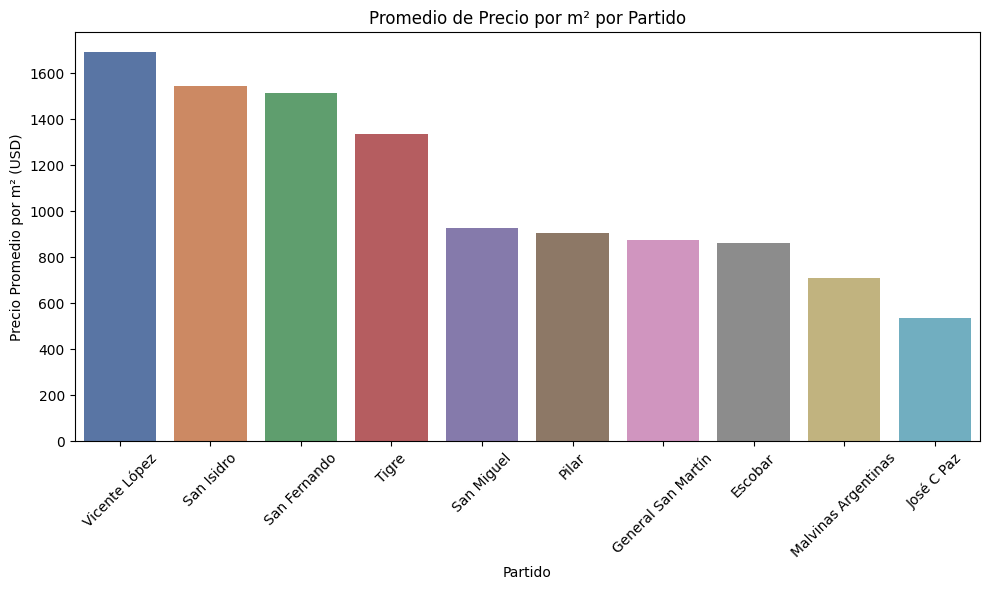

In [128]:
# Creo el gráfico de columnas

plt.figure(figsize=(10, 6))
ax= sns.barplot(data=promedio_m2_por_partido, x='l3', y='precio_m2', palette='deep')
plt.xticks(rotation=45)
plt.title('Promedio de Precio por m² por Partido')
plt.xlabel('Partido')
plt.ylabel('Precio Promedio por m² (USD)')
plt.tight_layout()
plt.show()



C:\Users\afontan1\AppData\Local\Temp\ipykernel_3132\3224625052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=promedio_m2_por_partido, x='l3', y='precio_m2', palette='tab10')


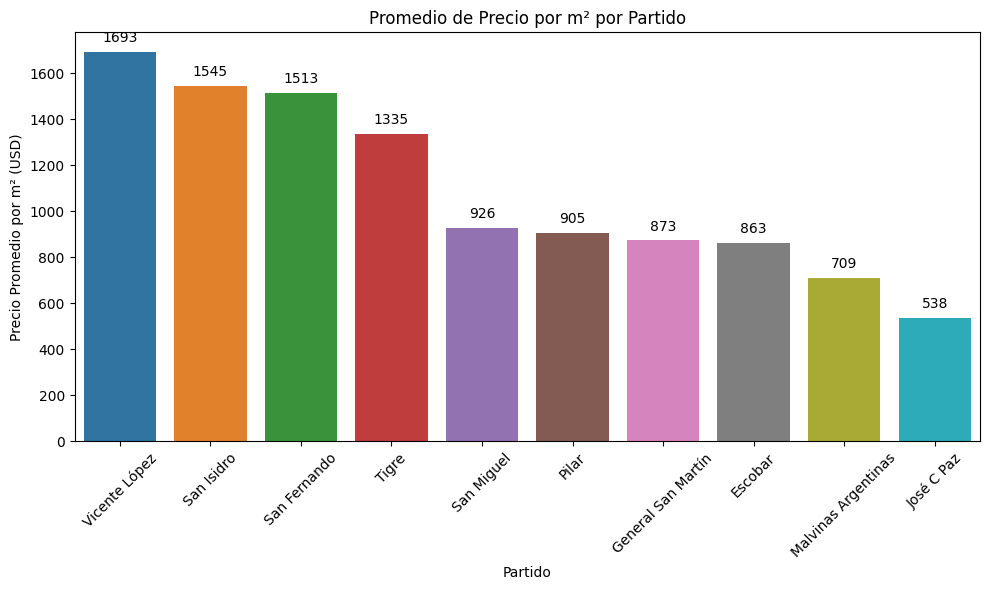

In [147]:

# Crear gráfico de columnas con etiquetas
#Configuro el tamaño del gráfico
plt.figure(figsize=(10, 6))
#Detallo los datos que va a incluir el gráico y la paleta de colores de los diferentes partidos. 
ax = sns.barplot(data=promedio_m2_por_partido, x='l3', y='precio_m2', palette='tab10')
# Configuro el grado de las etiquetas de los partidos para que se visualicen correctamente. 
plt.xticks(rotation=45)
# Coloco el título y los nombres de los ejes 
plt.title('Promedio de Precio por m² por Partido')
plt.xlabel('Partido')
plt.ylabel('Precio Promedio por m² (USD)')

# Agregar etiquetas sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

## Conclusión Hipótesis 1

De acuerdo al análisis efectuado del valor por m2 de mi dataset, se comprueba mi primera hipotésis, donde la opción de optar por propiedades en la zona periférica a San Isidro (a excepción de Vicente López) representan un ahorro o por el mismo valor se pueden comprar propiedad de mayor m2

## Análisis Alquileres

Ahora, vamos a analizar mi segunda hipótesis, la cual consistía en efectuar una comparativa de los valores de pago de cuota de crédito hipotecario vs pago de alquiler por una propiedad en la misma zona y de similares m2.

Para ello, voy a analizar, en principio, la calidad de los datos que tengo de propiedades en alquiler, para ver si me permiten efectuar un correcto análisis y ahí ir a buscar un dataset que me brinde información de las cuotas de los créditos hipotecarios en función de los precios de las propiedades el % de prestamo y la tasa de interés. 

In [194]:
# Parto de df, que es el dataset inicial que importe y realizo el mismo filtro de columnas
df_alquiler= df.drop(['ad_type','l5','l6','title','description'],axis=1)

In [195]:
# Filtro, al igual que el análisis anterior, que sea en zona norte y que sea una casa y, adicionalmente que el tipo de operación sea alquiler
filtros_alquiler = (df_alquiler['l2']=='Bs.As. G.B.A. Zona Norte') & (df_alquiler['operation_type']=='Alquiler') & (df_alquiler['property_type']=='Casa')

In [196]:
df_alquiler=df_alquiler[filtros_alquiler]

In [197]:
# Verifico el tamaño de mi dataset
df_alquiler.shape

(10166, 20)

Dentro de mi dataset puedo tener propiedades en USD o en ARS. Voy a analizar que cantidad de propiedades tengo en cada moneda para analizar si realizo un sub dataset.

In [198]:
df_alquiler['currency'].value_counts()

currency
ARS    7621
USD    2260
Name: count, dtype: int64

De las 10.166 casas en alquiler de mi dataset 7621 corresponden a valores en ARS. Voy a analizar si el dataset contiene el periodo de publicación, dado que al ser un valor en moneda local, la temporalidad es fundamental tenerla en consideración porque el valor puede estar desactualizado por un efecto inflacionario. 
Voy a realizar un sub_dataset de los alquileres en ARS y voy a analizar si cuento con la información del price_period.

In [208]:
#Filtro las 7621 propiedades
filtros_ars=(df_alquiler['currency']=='ARS')
df_alquiler_ars= df_alquiler[filtros_ars]

In [210]:
df_alquiler_ars.shape

(7621, 20)

In [212]:
df_alquiler_ars['price_period'].value_counts()

price_period
Mensual    3238
Name: count, dtype: int64

## Conclusión Hipótesis 2

El resultado del "price_period" no fue el esperado para poder efectuar un correcto análisis del precio del alquilar vs la cuota de la hipoteca. 

De los 7621 valores solo 3238 contienen información y donde yo esperaba una fecha del período del precio al cual habían publicado la propiedad indica la palabra "mensual" que solo me da la pauta que el valor del alquiler se abona con esa periodicidad. 

No avanzaremos con el análisis de la segunda hipotésis dado que mi data set no contiene información actualizada para efectuar dicha comparativa.

## Machine Learning

### Algoritmos de reducción de dimensionalidad del dataset

Vamos a utilizar este algoritmo como un medio para aplicar un algoritmo de regresion que me permita predecir el valor de una nueva propiedad. 

Nuestro dataset de propiedades cuenta con muchas variables, que sin bien nos aportan mucha información, pueden provocar ruido y redundancia.

Para simplificar nuestro análisis, sin perder la información esencial, vamos a utilizar PCA, tecnica que nos ayuda a reducir la cantidad de variables (columnas de nuestro dataset) manteniendo la mayor parte de la informacion.

In [220]:
# Para trabajar con algoritmos voy a importar las librerias que se encuentran en la bilioteca de sklearn
#Para trabajar con PCA:
from sklearn.decomposition import PCA

In [221]:
# Para normalizar los datos
from sklearn.preprocessing import StandardScaler

In [222]:
# Voy a seleccionar de mi dataset las columnas que tienen datos numéricos que considero relevantes

Columnas_PCA = ['bedrooms', 'bathrooms', 'surface_total', 'surface_covered','price', 'surface_covered_grupo', 'Precio_Miles', 'precio_m2']



In [223]:
# Me aseguro que todas mis filas cuenten con datos. Para ellos elimino valores faltantes

df_ml=df_analisis_VF_sin_outliers_sup[Columnas_PCA].dropna()

In [ ]:
# Normalizo la base para que todos los datos tengan la misma escala

scaler= StandardScaler()
data_normalizada=scaler.fit_transform(df_ml)

In [225]:
#Aplico PCA
pca=PCA()
pca.fit(data_normalizada)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [ ]:
# Calculo de la varianza

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()


In [227]:
# Selección del número de componentes para explicar al menos el 95% de la varianza (información total)
n_components_95 = next(i for i, total in enumerate(cumulative_variance) if total >= 0.95)

In [228]:
# Aplicación de PCA con el número optimo de componentes calculado en el paso anterior y aplicado al dataset original

pca_opt = PCA(n_components=n_components_95)
transformed_data = pca_opt.fit_transform(data_normalizada)


In [ ]:
print (pca_opt) 

PCA(n_components=4)


Al aplicar PCA, encontramos que con 4 componentes principales podemos la mayor parte de la variabilidad de los datos que nos permiten entender que es lo que esta pasando en el mercado inmobiliario (ventas de casas en GBA NORTE)

In [238]:
print (explained_variance[:n_components_95])

[0.37896551 0.21889625 0.1890553  0.1242481 ]


Cada uno de los 4 componentes principales capturan una parte de la información. 
El primero un 37,9%, el segundo un 21,9%, el tercero un 18,9% y el cuarto un 12,4%

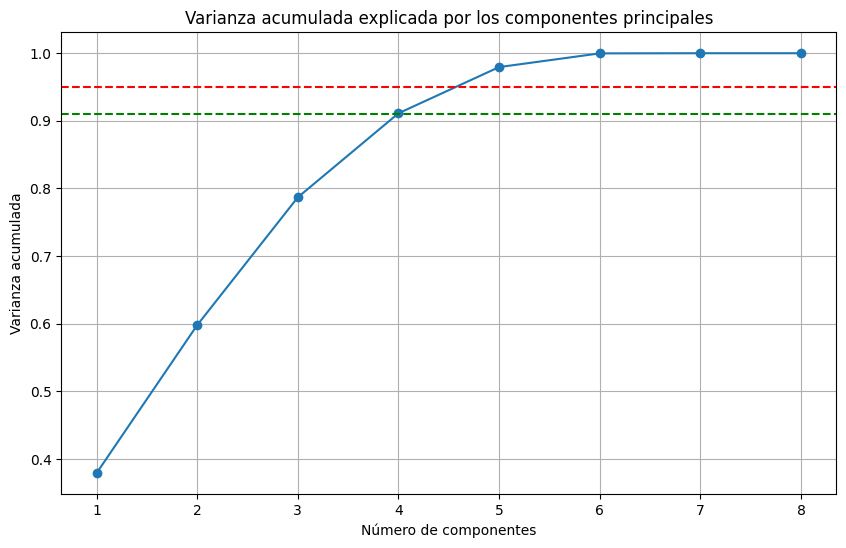

In [242]:

# Grafico para explicar cómo se acumula la varianza explicada a medida que se agregan componentes.
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axhline(y=0.91, color='g', linestyle='--')
plt.title('Varianza acumulada explicada por los componentes principales')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.show()


La línea verde nos permite visualizar que con 4 componentes explicamos el 91% de la variabilidad de los datos. 
Si quisieramos lograr al menos un 95% deberíamos ir a 5 componentes que supera el % de explicación de la variabilidad 

Reducir la cantidad de variables, nos va a permitir evitar redundancias y mejorar la eficiencia del modelo

### Análisis de regresión lineal

Luego de aplicar PCA para reducir la dimensionalidad de nuestro dataset, identificamos que 4 componentes principales eran suficientes para explicar el 91% de los datos y 5 componentes explicaban más del 95%.
Con esta base vamos a avanzar a realizar el cálculo del precio de una nueva propiedad que se incorpore a nuestra base de datos.

Para ello vamos a utilizar el método de regresión lineal, dado que el valor a predecir es numérico y continuo y vamos a entrenar estos componentes principales antes calculados.

In [243]:
# Importamos las librerias de las bibliotecas de sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [249]:
# Separo cuales son las variables que me van a ayudar a predecir y cual es la variable objetivo (la que quiero predecir)

x= df_ml[Columnas_PCA]
y= df_ml['price']

In [254]:
# Voy a dividir los datos de mi dataset en conjunto de entrenamiento y en conjunto de prueba
# El conjunto de pruebas me va a permitir analizar que tan bien predice el precio en propiedades que nunca ha visto, que son nuevas.
x_train, x_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.2, random_state=42)


In [ ]:
# Entreno el modelo de regresión lineal, busca la relación matemática entre las características de la propiedad incluidas en PCA y el precio.

model = LinearRegression()
model.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [258]:
# Evalúo el modelo con propiedades nuevas

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print (r2)


0.9473602534733321


Un 94,73% de r2 nos indica que el modelo explica el 94,73% de variabilidad del precio 

Quiero calcular el RMSE para que me de el error promedio en unidades monetarias que puede tener el cálculo de una nueva propiedad

In [260]:
#Calculo con Numpy la raiz cuadrada del mse

rmse=np.sqrt(mse)
print (rmse)

40533.468966499044


Este valor indica que el promedio se equivoca 40.533 USD al predecir un precio de la propiedad. 

In [261]:
# Vuelvo a explorar mi dataset para recordar los valores minimos y maximos con los que estoy trabajando de precio

df_ml['price'].describe()

count     24788.000000
mean     345288.366508
std      178243.838863
min        5000.000000
25%      212000.000000
50%      315000.000000
75%      445000.000000
max      895000.000000
Name: price, dtype: float64

Considerando que mi dataset las propiedades van desde 5.000 hasta 895.000 con un valor promedio de 345.288, tener un RMSE de 40.533 es bajo y, adicionalmente tener un r2 de 94,73% confirma que está capturando muy bien la relación entre las características de la propiedad y el precio de las mismas

Voy a generar un gráfico para visualizar los resultados de la aplicación del algoritmo de regresión lineal

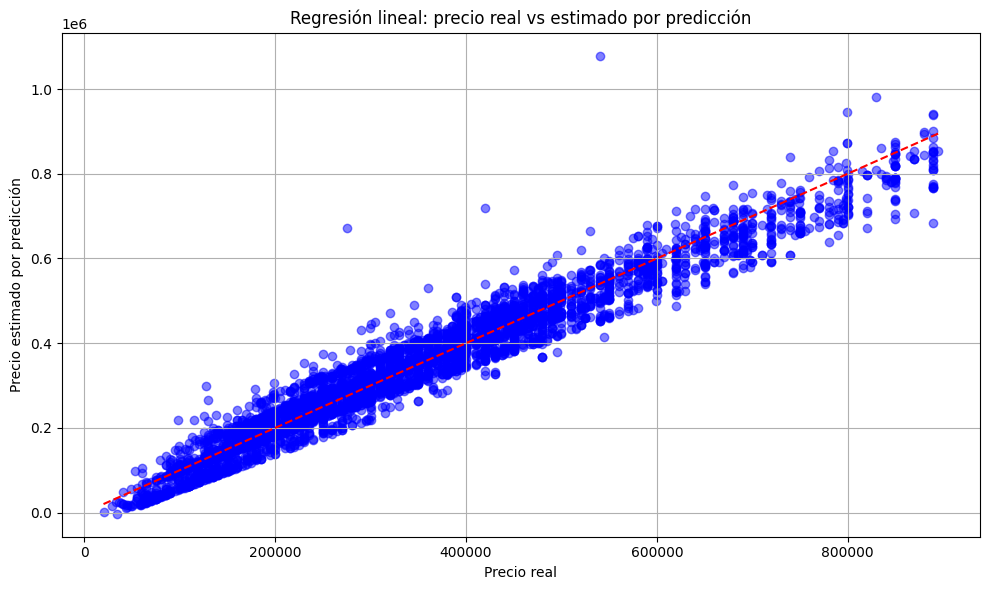

In [262]:

plt.figure(figsize=(10, 6))
# puntos de predicción
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')  
# Línea ideal
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel('Precio real')
plt.ylabel('Precio estimado por predicción')
plt.title('Regresión lineal: precio real vs estimado por predicción')
plt.grid(True)
plt.tight_layout()
plt.show()


Los puntos azules representan a las propiedades
En el eje X se encuentran los precios reales
En el eje Y se encuentran los valores predecidos
La línea punteada roja representa los puntos donde el precio real y el estimado coinciden. 
Cuanto más cercano estan los puntos azules a la línea roja, mejor está funcionando el modelo

# Conclusión del proyecto

A través del análisis explotatorio, con las bibliotecas de pandas y numpy, y a través de las herramientas de visualización, utilizando matplotlib y seaborn me permitieron evaluar la relación entre precio y metro cuadrado entre los diferentes partidos de zona norte de Gran Buenos Aires, permitiéndome comprobar que el partido en el cual actualmente alquilo es uno de los más caros de la zona, por lo que optar por mudarme a un partido aledaño me generarían un ahorro o comprar una propiedad con mayor cantidad de m2. 
A través del análisis exploratorio y de visualización pudimos indagar en los datos de propiedad que poseíamos y no nos permitió efectuar una conclusión respecto a la segunda hipotesis planteada al comienzo del proyecto, previo a disponer de la información y efectuar el correspondiente análisis. 
Por último, a través de la aplicación de PCA y regresión lineal, logramos construir un modelo eficiente para predecir el precio de propiedades. Este enfoque permitió reducir la complejidad del análisis sin perder capacidad explicativa (reduciendo los componentes a 4), alcanzando un R² de 94,73% y un error promedio razonable. 
El proyecto me demostró cómo técnicas de data science pueden aportar valor real en el ámbito del real state.     